In [1]:
import pandas as pd
import sklearn
import numpy as np

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
import matplotlib.pyplot as plt

# Student Info

In [2]:
student_info = pd.read_csv('./anonymisedData/studentInfo.csv')

In [88]:
student_info.groupby('final_result').count()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability
final_result,,,,,,,,,,,
Distinction,3024,3024,3024,3024,3024,3024,2825,3024,3024,3024,3024
Fail,7052,7052,7052,7052,7052,7052,6907,7052,7052,7052,7052
Pass,12361,12361,12361,12361,12361,12361,11830,12361,12361,12361,12361
Withdrawn,10156,10156,10156,10156,10156,10156,9920,10156,10156,10156,10156


In [87]:
student_info.hist('final_result')

ValueError: hist method requires numerical columns, nothing to plot.

In [4]:
student_info.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [5]:
student_info['imd_band'].unique()

array(['90-100%', '20-30%', '30-40%', '50-60%', '80-90%', '70-80%', nan,
       '60-70%', '40-50%', '10-20', '0-10%'], dtype=object)

In [6]:
student_info['age_band'].unique()

array(['55<=', '35-55', '0-35'], dtype=object)

In [7]:
student_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


# Assesment Data

In [8]:
assesments = pd.read_csv('./anonymisedData/assessments.csv')
student_assesments = pd.read_csv('./anonymisedData/studentAssessment.csv')

In [9]:
assesments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB


In [10]:
assesments = assesments.query('assessment_type != "Exam"')
assesments.drop(['date', 'weight'], axis=1, inplace=True);

In [11]:
student_assesments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  int64  
 1   id_student      173912 non-null  int64  
 2   date_submitted  173912 non-null  int64  
 3   is_banked       173912 non-null  int64  
 4   score           173739 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 6.6 MB


In [12]:
student_assesments.drop(['date_submitted', 'is_banked'], axis=1, inplace=True);

In [13]:
student_assesments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id_assessment  173912 non-null  int64  
 1   id_student     173912 non-null  int64  
 2   score          173739 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 4.0 MB


In [14]:
assesments.head()

,code_module,code_presentation,id_assessment,assessment_type
0,AAA,2013J,1752,TMA
1,AAA,2013J,1753,TMA
2,AAA,2013J,1754,TMA
3,AAA,2013J,1755,TMA
4,AAA,2013J,1756,TMA


In [15]:
student_assesments.head()

,id_assessment,id_student,score
0,1752,11391,78.0
1,1752,28400,70.0
2,1752,31604,72.0
3,1752,32885,69.0
4,1752,38053,79.0


In [16]:
merged_assessments = student_assesments.merge(assesments, on='id_assessment');
merged_assessments.sort_values(by=['id_student']).head()

,id_assessment,id_student,score,code_module,code_presentation,assessment_type
1756,1758,6516,60.0,AAA,2014J,TMA
1970,1759,6516,48.0,AAA,2014J,TMA
2376,1760,6516,63.0,AAA,2014J,TMA
2685,1761,6516,61.0,AAA,2014J,TMA
2871,1762,6516,77.0,AAA,2014J,TMA


In [17]:
merged_assessments = merged_assessments.groupby(['id_student', 'code_module', 'code_presentation', 'assessment_type'])['score'].mean().reset_index()
merged_assessments.head(20)

,id_student,code_module,code_presentation,assessment_type,score
0,6516,AAA,2014J,TMA,61.800000
1,8462,DDD,2013J,TMA,87.666667
2,8462,DDD,2014J,TMA,86.500000
3,11391,AAA,2013J,TMA,82.000000
4,23629,BBB,2013B,CMA,100.000000
5,23629,BBB,2013B,TMA,65.000000
6,23698,CCC,2014J,CMA,75.000000
7,23698,CCC,2014J,TMA,72.500000
8,23798,BBB,2013J,CMA,100.000000
9,23798,BBB,2013J,TMA,88.833333


In [18]:
merged_assessments = (merged_assessments.set_index(['id_student', 'code_module', 'code_presentation'])
        .pivot(columns="assessment_type")['score']
        .reset_index()
        .rename_axis(None, axis=1)
     )
merged_assessments.head()

,id_student,code_module,code_presentation,CMA,TMA
0,6516,AAA,2014J,NaN,61.800000
1,8462,DDD,2013J,NaN,87.666667
2,8462,DDD,2014J,NaN,86.500000
3,11391,AAA,2013J,NaN,82.000000
4,23629,BBB,2013B,100.0,65.000000


# VLE Data

In [75]:
vle = pd.read_csv('./anonymisedData/vle.csv', usecols=['id_site', 'activity_type'])
student_vle = pd.read_csv('./anonymisedData/studentVle.csv.gz')

In [76]:
vle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id_site        6364 non-null   int64 
 1   activity_type  6364 non-null   object
dtypes: int64(1), object(1)
memory usage: 99.6+ KB


In [77]:
student_vle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10655280 entries, 0 to 10655279
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   code_module        object
 1   code_presentation  object
 2   id_student         int64 
 3   id_site            int64 
 4   date               int64 
 5   sum_click          int64 
dtypes: int64(4), object(2)
memory usage: 487.8+ MB


In [78]:
merged_vle = student_vle.merge(vle, on='id_site')
del student_vle
merged_vle.head()

,code_module,code_presentation,id_student,id_site,date,sum_click,activity_type
0,AAA,2013J,28400,546652,-10,4,forumng
1,AAA,2013J,28400,546652,-10,1,forumng
2,AAA,2013J,28400,546652,-10,1,forumng
3,AAA,2013J,28400,546652,-10,8,forumng
4,AAA,2013J,30268,546652,-10,3,forumng


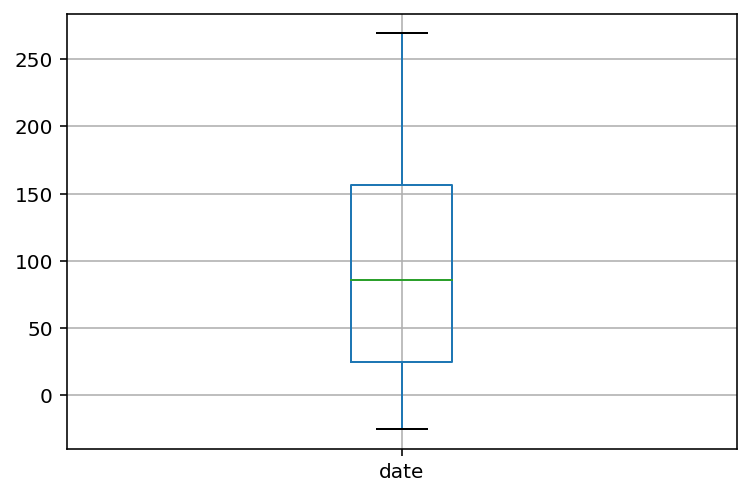

In [80]:
merged_vle.boxplot('date')

In [23]:
merged_vle = merged_vle.groupby(['id_student', 'code_module', 'code_presentation', 'activity_type'])
vle_visits = merged_vle['date'].count().reset_index()
vle_visits.head(20)

,id_student,code_module,code_presentation,activity_type,date
0,6516,AAA,2014J,dataplus,4
1,6516,AAA,2014J,forumng,175
2,6516,AAA,2014J,homepage,158
3,6516,AAA,2014J,oucontent,184
4,6516,AAA,2014J,resource,19
5,6516,AAA,2014J,subpage,73
6,6516,AAA,2014J,url,49
7,8462,DDD,2013J,externalquiz,9
8,8462,DDD,2013J,forumng,19
9,8462,DDD,2013J,homepage,52


In [24]:
vle_clicks = merged_vle['sum_click'].sum().reset_index()
vle_clicks.head(20)

,id_student,code_module,code_presentation,activity_type,sum_click
0,6516,AAA,2014J,dataplus,21
1,6516,AAA,2014J,forumng,451
2,6516,AAA,2014J,homepage,497
3,6516,AAA,2014J,oucontent,1505
4,6516,AAA,2014J,resource,31
5,6516,AAA,2014J,subpage,143
6,6516,AAA,2014J,url,143
7,8462,DDD,2013J,externalquiz,12
8,8462,DDD,2013J,forumng,36
9,8462,DDD,2013J,homepage,184


In [25]:
del merged_vle

In [26]:
vle_visits = (vle_visits.set_index(['id_student', 'code_module', 'code_presentation'])
        .pivot(columns="activity_type")['date']
        .reset_index()
        .rename_axis(None, axis=1)
     )
vle_visits.head()

,id_student,code_module,code_presentation,dataplus,dualpane,externalquiz,folder,forumng,glossary,homepage,...,ouelluminate,ouwiki,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url
0,6516,AAA,2014J,4.0,NaN,NaN,NaN,175.0,NaN,158.0,...,NaN,NaN,NaN,NaN,NaN,NaN,19.0,NaN,73.0,49.0
1,8462,DDD,2013J,NaN,NaN,9.0,NaN,19.0,NaN,52.0,...,NaN,5.0,NaN,NaN,NaN,NaN,51.0,NaN,114.0,17.0
2,8462,DDD,2014J,NaN,NaN,NaN,NaN,2.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11391,AAA,2013J,NaN,NaN,NaN,NaN,52.0,NaN,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,11.0,4.0
4,23629,BBB,2013B,NaN,NaN,NaN,NaN,24.0,NaN,16.0,...,NaN,NaN,NaN,NaN,15.0,NaN,2.0,NaN,2.0,NaN


In [27]:
vle_clicks = (vle_clicks.set_index(['id_student', 'code_module', 'code_presentation'])
        .pivot(columns="activity_type")['sum_click']
        .reset_index()
        .rename_axis(None, axis=1)
     )
vle_clicks.head()

,id_student,code_module,code_presentation,dataplus,dualpane,externalquiz,folder,forumng,glossary,homepage,...,ouelluminate,ouwiki,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url
0,6516,AAA,2014J,21.0,NaN,NaN,NaN,451.0,NaN,497.0,...,NaN,NaN,NaN,NaN,NaN,NaN,31.0,NaN,143.0,143.0
1,8462,DDD,2013J,NaN,NaN,12.0,NaN,36.0,NaN,184.0,...,NaN,18.0,NaN,NaN,NaN,NaN,70.0,NaN,227.0,23.0
2,8462,DDD,2014J,NaN,NaN,NaN,NaN,2.0,NaN,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11391,AAA,2013J,NaN,NaN,NaN,NaN,193.0,NaN,138.0,...,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,32.0,5.0
4,23629,BBB,2013B,NaN,NaN,NaN,NaN,87.0,NaN,36.0,...,NaN,NaN,NaN,NaN,31.0,NaN,2.0,NaN,5.0,NaN


# Master Merged Table

In [28]:
master = pd.merge(student_info, merged_assessments, on=['id_student', 'code_module', 'code_presentation'])
master = master.merge(vle_visits.add_suffix('_visits'), left_on=['id_student', 'code_module', 'code_presentation'],
                     right_on=['id_student_visits', 'code_module_visits', 'code_presentation_visits'])
master = master.merge(vle_clicks.add_suffix('_clicks'), left_on=['id_student', 'code_module', 'code_presentation'],
                     right_on=['id_student_clicks', 'code_module_clicks', 'code_presentation_clicks'])
master.drop(['id_student_visits', 'code_module_visits', 'code_presentation_visits', 
             'id_student_clicks', 'code_module_clicks', 'code_presentation_clicks'], axis=1, inplace=True)

In [29]:
master['final_result'].unique()

array(['Pass', 'Withdrawn', 'Fail', 'Distinction'], dtype=object)

In [30]:
master.query('final_result != "Withdrawn"', inplace=True)

In [31]:
master

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,...,ouelluminate_clicks,ouwiki_clicks,page_clicks,questionnaire_clicks,quiz_clicks,repeatactivity_clicks,resource_clicks,sharedsubpage_clicks,subpage_clicks,url_clicks
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,...,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,32.0,5.0
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,87.0,48.0
2,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,...,NaN,NaN,NaN,NaN,NaN,NaN,19.0,NaN,144.0,90.0
3,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,...,NaN,NaN,NaN,NaN,NaN,NaN,45.0,NaN,79.0,14.0
4,AAA,2013J,38053,M,Wales,A Level or Equivalent,80-90%,35-55,0,60,...,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,91.0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25784,GGG,2014J,2606765,F,London Region,Lower Than A Level,80-90%,0-35,0,30,...,NaN,NaN,NaN,NaN,106.0,NaN,12.0,NaN,37.0,NaN
25785,GGG,2014J,2620947,F,Scotland,A Level or Equivalent,80-90%,0-35,0,30,...,NaN,NaN,NaN,NaN,116.0,NaN,24.0,NaN,20.0,NaN
25786,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,...,NaN,NaN,NaN,NaN,152.0,NaN,109.0,NaN,47.0,NaN
25787,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,...,NaN,NaN,NaN,NaN,130.0,NaN,19.0,NaN,20.0,NaN


# Train Test Split

In [32]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21117 entries, 0 to 25789
Data columns (total 54 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   code_module            21117 non-null  object 
 1   code_presentation      21117 non-null  object 
 2   id_student             21117 non-null  int64  
 3   gender                 21117 non-null  object 
 4   region                 21117 non-null  object 
 5   highest_education      21117 non-null  object 
 6   imd_band               20259 non-null  object 
 7   age_band               21117 non-null  object 
 8   num_of_prev_attempts   21117 non-null  int64  
 9   studied_credits        21117 non-null  int64  
 10  disability             21117 non-null  object 
 11  final_result           21117 non-null  object 
 12  CMA                    12862 non-null  float64
 13  TMA                    20611 non-null  float64
 14  dataplus_visits        2648 non-null   float64
 15  du

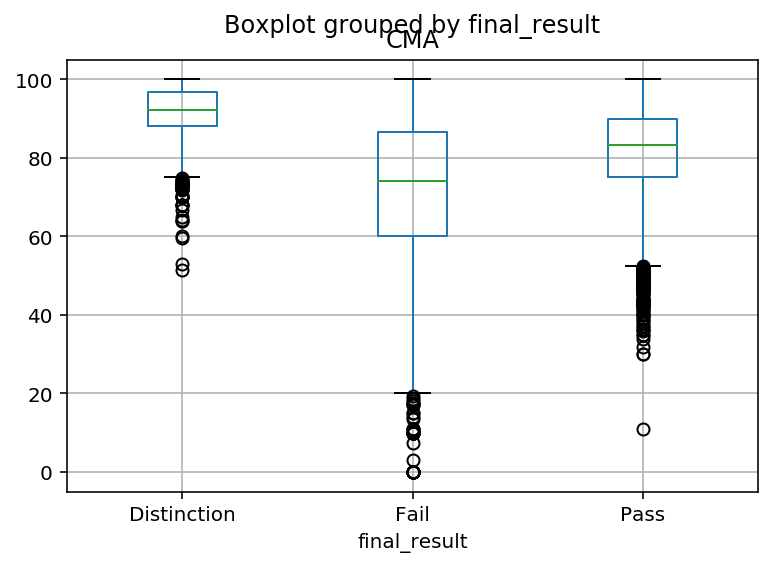

In [72]:
master.boxplot(column = 'CMA', by = 'final_result' )

In [33]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(master, test_size=0.2, random_state=20)
print('train:', len(train_set), 'test:', len(test_set))

train: 16893 test: 4224


In [34]:
student_course = train_set.drop('final_result', axis=1) 
student_course_labels = train_set['final_result'].copy()

In [35]:
print('age', student_course['age_band'].unique(), 'imd', student_course['imd_band'].unique())
imd_dict = {'0-10%': 5, '10-20': 15, '10-20%': 15, '20-30%': 25, '30-40%': 35, '40-50%': 45,
            '50-60%': 55, '60-70%': 65, '70-80%': 75, '80-90%': 90, '90-100%': 95}
age_dict = {'0-35': 17.5, '35-55': 45, '55<=': 82.5}

age ['35-55' '0-35' '55<='] imd ['10-20' '50-60%' '70-80%' '90-100%' '60-70%' '40-50%' '30-40%' nan
 '20-30%' '0-10%' '80-90%']


In [36]:
student_course.replace({"age_band": age_dict, "imd_band": imd_dict}, inplace=True)

In [37]:
student_course

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,...,ouelluminate_clicks,ouwiki_clicks,page_clicks,questionnaire_clicks,quiz_clicks,repeatactivity_clicks,resource_clicks,sharedsubpage_clicks,subpage_clicks,url_clicks
6416,BBB,2014J,691683,F,East Midlands Region,Lower Than A Level,15.0,45.0,0,60,...,NaN,NaN,NaN,12.0,71.0,NaN,47.0,NaN,10.0,1.0
9808,CCC,2014J,686558,M,East Midlands Region,A Level or Equivalent,55.0,17.5,0,120,...,NaN,NaN,NaN,NaN,571.0,NaN,72.0,NaN,51.0,1.0
7805,CCC,2014B,626714,M,West Midlands Region,A Level or Equivalent,75.0,17.5,0,60,...,NaN,NaN,2.0,NaN,398.0,NaN,46.0,NaN,76.0,9.0
23479,FFF,2014J,696674,M,London Region,A Level or Equivalent,95.0,17.5,0,120,...,NaN,5.0,1.0,2.0,662.0,NaN,20.0,NaN,150.0,2.0
19697,FFF,2013J,578276,F,North Western Region,A Level or Equivalent,65.0,17.5,0,120,...,NaN,NaN,1.0,NaN,2.0,NaN,7.0,NaN,18.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1883,BBB,2013B,559610,F,East Midlands Region,A Level or Equivalent,55.0,45.0,0,60,...,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaN,3.0,NaN
4525,BBB,2014B,623882,F,North Region,Lower Than A Level,35.0,17.5,0,60,...,NaN,NaN,NaN,NaN,66.0,NaN,43.0,NaN,32.0,4.0
18262,FFF,2013B,544880,M,West Midlands Region,Lower Than A Level,95.0,17.5,0,120,...,3.0,10.0,13.0,NaN,167.0,NaN,14.0,NaN,78.0,16.0
5045,BBB,2014J,238144,F,Wales,A Level or Equivalent,45.0,45.0,3,60,...,NaN,NaN,NaN,NaN,171.0,NaN,32.0,NaN,27.0,2.0


In [38]:
vle_types = student_course.filter(regex='_visits$',axis=1).columns.values.tolist() + \
            student_course.filter(regex='_clicks$',axis=1).columns.values.tolist()
other_numeric = ['imd_band', 'age_band', 'num_of_prev_attempts', 'studied_credits', 'CMA', 'TMA']

In [39]:
student_course[vle_types]=student_course[vle_types].fillna(0)
student_course[other_numeric]=student_course[other_numeric].fillna(student_course.mean().iloc[0])

student_course.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16893 entries, 6416 to 19468
Data columns (total 53 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   code_module            16893 non-null  object 
 1   code_presentation      16893 non-null  object 
 2   id_student             16893 non-null  int64  
 3   gender                 16893 non-null  object 
 4   region                 16893 non-null  object 
 5   highest_education      16893 non-null  object 
 6   imd_band               16893 non-null  float64
 7   age_band               16893 non-null  float64
 8   num_of_prev_attempts   16893 non-null  int64  
 9   studied_credits        16893 non-null  int64  
 10  disability             16893 non-null  object 
 11  CMA                    16893 non-null  float64
 12  TMA                    16893 non-null  float64
 13  dataplus_visits        16893 non-null  float64
 14  dualpane_visits        16893 non-null  float64
 15 

In [40]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
ct = ColumnTransformer([
    ('cat', OneHotEncoder(), ['code_module', 'code_presentation', 'gender', 'region', 'highest_education']),
    ('std_scaler', StandardScaler(), vle_types + other_numeric)],
     remainder='drop')

In [41]:
student_course_prepared = ct.fit_transform(student_course)

In [42]:
student_course_prepared.shape

(16893, 77)

In [43]:
student_course_prepared[1]

array([ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  1.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.30244018, -0.32317319, -0.30044769, -0.27974745,
       -0.52425703, -0.2170532 , -0.51574442, -0.22849579, -0.26143729,
       -0.8280063 , -0.20859417, -0.49804582, -0.45485531, -0.35537507,
        0.31514184, -0.01067013,  0.32942072, -0.06573435, -0.509364  ,
       -0.71659308, -0.27213614, -0.2890439 , -0.28609987, -0.27047357,
       -0.43202035, -0.10119466, -0.29746739, -0.21975178, -0.29891743,
       -0.67343366, -0.18514463, -0.3943459 , -0.404925  , -0.35834511,
        0.50640975, -0.01067013,  0.34968549, -0.06337301, -0.52

# Training

In [44]:
student_course_labels

6416     Pass
9808     Pass
7805     Fail
23479    Pass
19697    Fail
         ... 
1883     Fail
4525     Pass
18262    Fail
5045     Fail
19468    Pass
Name: final_result, Length: 16893, dtype: object

In [46]:
forest_class.predict(student_course_prepared[0:5])

NameError: name 'forest_class' is not defined

In [45]:
print(student_course_labels.unique())
lab_dict = {'Pass': 'Pass', 'Fail': 'Fail', 'Withdrawn': 'Fail', 'Distinction': 'Pass'}
student_course_labels.replace(lab_dict, inplace=True)
print(student_course_labels.unique())

['Pass' 'Fail' 'Distinction']
['Pass' 'Fail']


In [46]:
from sklearn.tree import DecisionTreeClassifier
tree_class = DecisionTreeClassifier()
tree_class.fit(student_course_prepared, student_course_labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [47]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_class, student_course_prepared, student_course_labels, 
                         scoring="roc_auc", cv=5) 
print(scores)
print(np.mean(scores))

[0.76876302 0.75186075 0.75486732 0.74914228 0.74989329]
0.7549053311108345


In [48]:
from sklearn.ensemble import RandomForestClassifier
forest_class = RandomForestClassifier(n_estimators=100)
forest_class.fit(student_course_prepared, student_course_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [49]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(forest_class, student_course_prepared, student_course_labels, 
                         scoring="roc_auc", cv=5) 
print(scores)
print(np.mean(scores))

[0.91610953 0.91288406 0.91349209 0.91662131 0.91377515]
0.9145764282896869


## Fine Tuning

In [50]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators': [50, 100, 200, 300], 'max_features': [8, 10, 12, 14, 16]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

grid_search = GridSearchCV(forest_class, param_grid, cv=5, scoring='roc_auc', return_train_score=True, 
                           refit=True, n_jobs=5) 
grid_search.fit(student_course_prepared, student_course_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [51]:
cvres = grid_search.cv_results_
for score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(score, params)

0.9111716029414426 {'max_features': 8, 'n_estimators': 50}
0.9142231450897498 {'max_features': 8, 'n_estimators': 100}
0.916170882333964 {'max_features': 8, 'n_estimators': 200}
0.9174426265292663 {'max_features': 8, 'n_estimators': 300}
0.9121970908696954 {'max_features': 10, 'n_estimators': 50}
0.9163214150971477 {'max_features': 10, 'n_estimators': 100}
0.9175429336836892 {'max_features': 10, 'n_estimators': 200}
0.917441465697544 {'max_features': 10, 'n_estimators': 300}
0.9124521831810466 {'max_features': 12, 'n_estimators': 50}
0.9156611439409881 {'max_features': 12, 'n_estimators': 100}
0.9170433671223861 {'max_features': 12, 'n_estimators': 200}
0.9174896133948124 {'max_features': 12, 'n_estimators': 300}
0.9137509028807326 {'max_features': 14, 'n_estimators': 50}
0.915812225164087 {'max_features': 14, 'n_estimators': 100}
0.916973118022541 {'max_features': 14, 'n_estimators': 200}
0.9179213932123895 {'max_features': 14, 'n_estimators': 300}
0.9120129256361114 {'max_features': 

In [52]:
from joblib import dump
dump(grid_search.best_estimator_, "my_model.pkl")

['my_model.pkl']

In [53]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=14,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# Test

In [54]:
from joblib import load

forest_class = load('my_model.pkl')

In [56]:
y_predictions = (forest_class.predict(student_course_prepared) == 'Pass')
y_true = (student_course_labels == 'Pass')

In [57]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
print('accuracy', accuracy_score(y_true, y_predictions))
print('precision', precision_score(y_true, y_predictions))
print('recall', recall_score(y_true, y_predictions))

accuracy 1.0
precision 1.0
recall 1.0


In [58]:
y_predictions = forest_class.predict_proba(student_course_prepared)[:,1]

In [59]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_true, y_predictions)

1.0

In [60]:
y_predictions[:15]

array([0.97333333, 0.85666667, 0.31333333, 0.91333333, 0.00333333,
       0.95      , 1.        , 0.15      , 0.        , 0.94      ,
       0.98666667, 0.21666667, 0.99      , 0.99333333, 0.94666667])

In [61]:
y_true[:15]

6416      True
9808      True
7805     False
23479     True
19697    False
23026     True
2703      True
22206    False
7663     False
5300      True
21534     True
2454     False
2348      True
24563     True
16647     True
Name: final_result, dtype: bool

In [69]:
correct = 0
total = 0
for index, p in enumerate(forest_class.predict(student_course_prepared)):
    total += 1
    if (p == 'Pass') == y_true.iloc[index]:
        correct += 1
print(correct, total)

16893 16893


In [63]:
y_true

6416      True
9808      True
7805     False
23479     True
19697    False
         ...  
1883     False
4525      True
18262    False
5045     False
19468     True
Name: final_result, Length: 16893, dtype: bool

In [64]:
type(y_true)

pandas.core.series.Series

In [67]:
y_true.iloc[1]

True

In [68]:
forest_class.predict(student_course_prepared)[1]

'Pass'